<a href="https://colab.research.google.com/github/LuArtale/SkyPhotoTips/blob/master/HPC/Artale_Luciano_ejercicio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio 3: Aproximacion del numero "e" utilizando OpenMP

## Introduccion:

Para explorar la plataforma y los recursos que ofrece Colab decidi desarrollar una funcion que calcule una aproximacion del numero e con las funciones de la biblioteca OpenMP 

## Armado del ambiente:

El ambiente de ejecucion utiliza la CPU y sus distintos nucleos para ejecutar este ejercicio. Luego de seleccionar la opcion de ambiente "None" se debe ejecutar la seccion de codigo que contiene el codigo principal en C++. Siguiente a esto se debe ejecutar la seccion que genera el archivo objeto, y finalmente se deben indicar los parametros deseados en la ultima seccion y ejecutar el ejercicio propiamente dicho.

## Codigo principal para OpenMP en C++

In [14]:


# Codigo Python, que tiene el código C++ de la ejecución de Aproximacion del numero e.
code = """
#include <iostream>
#include <vector>
#include <cstdlib>
#include <sys/time.h>
#include <omp.h>    // Cabecera OpenMP  
#include <math.h>  
#include <iostream>
#include <fstream>

// ----------------------------------------------------------------------------
// Macros que miden el tiempo.

static double dHashTiempoHistory[3];
static struct timeval tv;

#define TIEMPO_INI( h )      \
   gettimeofday(&tv,NULL);   \
   dHashTiempoHistory[ h ] = tv.tv_sec + tv.tv_usec/1000000.0;
   
   
#define TIEMPO_FIN( h )      \
   gettimeofday(&tv,NULL);   \
   dHashTiempoHistory[ h ] = ((tv.tv_sec + tv.tv_usec/1000000.0) - dHashTiempoHistory[ h ]) * 1000; // Devuelvo en milisegundos
#define TIEMPO_GET( h ) dHashTiempoHistory[ h ]

#define HTH_TOTAL         1
#define HTH_NUME_SEC      2
#define HTH_NUME_OMP      3

// ----------------------------------------------------------------------------

int main(int argc, char* argv[]) 
{ 
  int i,c,j;
  double val_e_sec, val_e_omp;
  TIEMPO_INI( HTH_TOTAL )

  // Leo los parametros.
  if( argc != 3 )
  {
      std::cerr<< " Error en los parametros de indicar: (Nivel de aproximacion), (Ciclos de ejecucion)."<<argc<<std::endl;
      exit( -1 );
  }

  int nivel_de_aproximacion = atoi( argv[1] );
  int ciclos = atoi( argv[2] );

  // Creo archivo de resultados
  std::ofstream outfile ("resultados.txt");

  // --------------------------------------------
  // Realizo la función e en forma secuencial.

  TIEMPO_INI( HTH_NUME_SEC )

  for(c=0;c<ciclos;c++)
  {
    val_e_sec = 1.0;
    for(i=1;i<=nivel_de_aproximacion;i++)
    {
      double divRes = (double)1 / (double)nivel_de_aproximacion;
      val_e_sec *= (double)((double)1 + divRes);
    }
  }

  TIEMPO_FIN( HTH_NUME_SEC )

  // --------------------------------------------
  // Realizo la función e con OpenMP.

  TIEMPO_INI( HTH_NUME_OMP )

  for(c=0;c<ciclos;c++)
  {
    val_e_omp = 1.0;

    //SECCION PARALELA//
    #pragma omp parallel for reduction(*: val_e_omp)
    for(i=1;i<=nivel_de_aproximacion;i++)
    {
      double divRes = (double)1 / (double)nivel_de_aproximacion;
      val_e_omp *= (double)((double)1 + divRes);
    }
    //SECCION PARALELA//
  }

  TIEMPO_FIN( HTH_NUME_OMP )


  // --------------------------------------------
  // Muestro los resultados.
  std::cout<<"------------------------------------------------------"<<std::endl;
  std::cout<<"Resultados:"<<std::endl;
  std::cout<<"* Nivel de aproximacion: "<<nivel_de_aproximacion<<std::endl;
  std::cout<<"* Numero e calculado secuencialmente: ";
  printf("%.6f", val_e_sec);  
  std::cout<<""<<std::endl;
  std::cout<<"* Numero e calculado paralelamente con OpenMP: ";
  printf("%.6f", val_e_omp); 
  std::cout<<""<<std::endl;

  TIEMPO_FIN( HTH_TOTAL )

  std::cout<<std::endl;
  std::cout<<"* Tiempo TOTAL     : "<<TIEMPO_GET(HTH_TOTAL)<<" [ms]"<<std::endl;
  outfile << TIEMPO_GET(HTH_TOTAL) << std::endl;
  std::cout<<"* Tiempo aprox_e Sec  : "<<TIEMPO_GET(HTH_NUME_SEC)<<" [ms]"<<std::endl;
  outfile << TIEMPO_GET(HTH_NUME_SEC) << std::endl;
  std::cout<<"* Tiempo aprox_e Omp  : "<<TIEMPO_GET(HTH_NUME_OMP)<<" [ms]"<<std::endl;
  outfile << TIEMPO_GET(HTH_NUME_OMP) << std::endl;
  outfile << TIEMPO_GET(HTH_NUME_SEC)/TIEMPO_GET(HTH_NUME_OMP) << std::endl;
  outfile << TIEMPO_GET(HTH_NUME_SEC)/(omp_get_num_procs()*TIEMPO_GET(HTH_NUME_OMP)) << std::endl;
  outfile << TIEMPO_GET(HTH_NUME_SEC) << std::endl;
  outfile << omp_get_num_procs()*TIEMPO_GET(HTH_NUME_OMP) << std::endl;
  outfile << (omp_get_num_procs()*TIEMPO_GET(HTH_NUME_OMP))-TIEMPO_GET(HTH_NUME_SEC) << std::endl;


  TIEMPO_GET(HTH_NUME_OMP) = TIEMPO_GET(HTH_NUME_SEC) / 2;
  outfile << TIEMPO_GET(HTH_TOTAL) << std::endl;
  outfile << TIEMPO_GET(HTH_NUME_SEC) << std::endl;
  outfile << TIEMPO_GET(HTH_NUME_OMP) << std::endl;

  outfile << TIEMPO_GET(HTH_NUME_SEC)/TIEMPO_GET(HTH_NUME_OMP) << std::endl;
  outfile << TIEMPO_GET(HTH_NUME_SEC)/(omp_get_num_procs()*TIEMPO_GET(HTH_NUME_OMP)) << std::endl;
  outfile << TIEMPO_GET(HTH_NUME_SEC) << std::endl;
  outfile << omp_get_num_procs()*TIEMPO_GET(HTH_NUME_OMP) << std::endl;
  outfile << (omp_get_num_procs()*TIEMPO_GET(HTH_NUME_OMP))-TIEMPO_GET(HTH_NUME_SEC) << std::endl;

  std::cout<<"------------------------------------------------------"<<std::endl;

  outfile.close(); 

}
// ----------------------------------------------------------------------------

"""
text_file = open("code_aprox_e.cpp", "w")
text_file.write(code)
text_file.close()

## Generar archivo objeto mediante el compilador de c++:

In [15]:
!g++ -o aprox_e -fopenmp code_aprox_e.cpp

## Ejecutar ejercicio compilado:

El codigo anterior se ejecutara 7 veces con distintos niveles de aproximacion (iteraciones de 10 a 10.000.000) para luego obtener y comparar los resultados de sus tiempos de ejecucion mediante un grafico. Tambien si se desea se puede generar una hoja de calculo con todos los resultados obtenidos y calculados de forma mas completa.

------------------------------------------------------
--------------------EJECUCIONES-----------------------
------------------------------------------------------
env: OMP_NUM_THREADS=8
------------------------------------------------------
Resultados:
* Nivel de aproximacion: 10
* Numero e calculado secuencialmente: 2.593742
* Numero e calculado paralelamente con OpenMP: 2.593742

* Tiempo TOTAL     : 2.76709 [ms]
* Tiempo aprox_e Sec  : 0.00190735 [ms]
* Tiempo aprox_e Omp  : 2.46716 [ms]
------------------------------------------------------
env: OMP_NUM_THREADS=8
------------------------------------------------------
Resultados:
* Nivel de aproximacion: 100
* Numero e calculado secuencialmente: 2.704814
* Numero e calculado paralelamente con OpenMP: 2.704814

* Tiempo TOTAL     : 1.52302 [ms]
* Tiempo aprox_e Sec  : 0.0100136 [ms]
* Tiempo aprox_e Omp  : 1.25504 [ms]
------------------------------------------------------
env: OMP_NUM_THREADS=8
------------------------------------

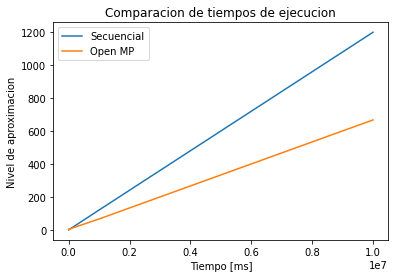

------------------------------------------------------
--------------------SPREADSHEET-----------------------
------------------------------------------------------
Hoja de calculo creada en su drive


In [22]:
#@title Parámetros de ejecución { vertical-output: true }
# Parametros
#@markdown Marque el check e ingrese un nombre para la hoja de calculo si desea que se genere una
generar_spreadsheet = True #@param {type:"boolean"}
nombre_hoja_de_calculo = "Resultados aprox numero e"#@param {type: "string"}

#@markdown Luego de la ejecucion ingrese a https://sheets.google.com para ver su hoja de calculo creada con los resultados

#@markdown ---


try:

  # Importo biblioteca para hacer graficos
  from matplotlib import pyplot as plt

  # Defino vectores para los resultados de cada ejecucion
  tiempos_nivel_10 = []
  tiempos_nivel_100 = []
  tiempos_nivel_1000 = []
  tiempos_nivel_10000 = []
  tiempos_nivel_100000 = []
  tiempos_nivel_1000000 = []
  tiempos_nivel_10000000 = []

  print("------------------------------------------------------")
  print("--------------------EJECUCIONES-----------------------")
  print("------------------------------------------------------")
  # Para nivel de aproximacion = 10
  %env OMP_NUM_THREADS=8
  !./aprox_e 10 10

  with open('resultados.txt') as results_file:
      lines = [line.rstrip() for line in results_file]

  for line in lines:
      tiempos_nivel_10.append(float(line))

  # Para nivel de aproximacion = 100
  %env OMP_NUM_THREADS=8
  !./aprox_e 100 10

  with open('resultados.txt') as results_file:
      lines = [line.rstrip() for line in results_file]

  for line in lines:
      tiempos_nivel_100.append(float(line))

  # Para nivel de aproximacion = 1000
  %env OMP_NUM_THREADS=8
  !./aprox_e 1000 10

  with open('resultados.txt') as results_file:
      lines = [line.rstrip() for line in results_file]

  for line in lines:
      tiempos_nivel_1000.append(float(line))

  # Para nivel de aproximacion = 10000
  %env OMP_NUM_THREADS=8
  !./aprox_e 10000 10

  with open('resultados.txt') as results_file:
      lines = [line.rstrip() for line in results_file]

  for line in lines:
      tiempos_nivel_10000.append(float(line))

  # Para nivel de aproximacion = 100000
  %env OMP_NUM_THREADS=8
  !./aprox_e 100000 10

  with open('resultados.txt') as results_file:
      lines = [line.rstrip() for line in results_file]

  for line in lines:
      tiempos_nivel_100000.append(float(line))

  # Para nivel de aproximacion = 1000000
  %env OMP_NUM_THREADS=8
  !./aprox_e 1000000 10

  with open('resultados.txt') as results_file:
      lines = [line.rstrip() for line in results_file]

  for line in lines:
      tiempos_nivel_1000000.append(float(line))

  # Para nivel de aproximacion = 10000000
  %env OMP_NUM_THREADS=8
  !./aprox_e 10000000 10

  with open('resultados.txt') as results_file:
      lines = [line.rstrip() for line in results_file]

  for line in lines:
      tiempos_nivel_10000000.append(float(line))


  print("------------------------------------------------------")
  print("----------------------GRAFICO-------------------------")
  print("------------------------------------------------------")

  # Armar vectores para mostrar resultados
  nivel_sec_x = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
  tiempo_sec_y = [tiempos_nivel_10[1], tiempos_nivel_100[1], tiempos_nivel_1000[1], tiempos_nivel_10000[1], tiempos_nivel_100000[1], tiempos_nivel_1000000[1], tiempos_nivel_10000000[1]]

  nivel_x = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
  tiempo_omp_y = [tiempos_nivel_10[2], tiempos_nivel_100[2], tiempos_nivel_1000[2], tiempos_nivel_10000[2], tiempos_nivel_100000[2], tiempos_nivel_1000000[2], tiempos_nivel_10000000[2]]

  # Genero el grafico de la comparacion entre tiempos de ejecucion
  plt.plot(nivel_x, tiempo_sec_y, label="Secuencial")
  plt.plot(nivel_x, tiempo_omp_y, label="Open MP")
  plt.plot()

  plt.xlabel("Tiempo [ms]")
  plt.ylabel("Nivel de aproximacion")
  plt.title("Comparacion de tiempos de ejecucion")
  plt.legend()
  plt.show()

  if generar_spreadsheet and nombre_hoja_de_calculo != "" :

    print("------------------------------------------------------")
    print("--------------------SPREADSHEET-----------------------")
    print("------------------------------------------------------")

    # Importo autentificaciones de Google
    from google.colab import auth
    auth.authenticate_user()

    # Importo biblioteca para usar spread sheets
    import gspread
    from oauth2client.client import GoogleCredentials


    # Pedir autorizacion para spread sheet (hoja de calculo)
    gc = gspread.authorize(GoogleCredentials.get_application_default())

    # Crear nueva hoja de calculo con el nombre de parametro
    sh = gc.create(nombre_hoja_de_calculo)


    # Abrir la hoja de calculo
    worksheet = gc.open(nombre_hoja_de_calculo).sheet1

    # Gernerar enabezados de la hoja de calculo
    nombres_filas = ["Valores Reales","Tiempo TOTAL","Tiempo aprox_e Sec","Tiempo aprox_e Omp","SpeedUp","Eficiencia","Coste Sec","Coste Omp","Funcion Overhead", "Valores Ideales","Tiempo TOTAL","Tiempo aprox_e Sec","Tiempo aprox_e Omp","SpeedUp","Eficiencia","Coste Sec","Coste Omp","Funcion Overhead"]
    vector_tabla = [nombres_filas[0],10, 100, 1000, 10000, 100000, 1000000, 10000000]

    # Guardar valores en el vector que pasara a ser la tabla
    for i in range(0,8):
      vector_tabla.append(nombres_filas[i+1])
      vector_tabla.append(tiempos_nivel_10[i])
      vector_tabla.append(tiempos_nivel_100[i])
      vector_tabla.append(tiempos_nivel_1000[i])
      vector_tabla.append(tiempos_nivel_10000[i])
      vector_tabla.append(tiempos_nivel_100000[i])
      vector_tabla.append(tiempos_nivel_1000000[i])
      vector_tabla.append(tiempos_nivel_10000000[i])

    # Definir rango de trabajo la hoja
    cell_list = worksheet.range('A1:H9')

    # Cargar la lista de celdas con lso valores del vector tabla
    i=0
    for cell in cell_list:
      cell.value = vector_tabla[i]
      i=i+1

    # Guardar todos los resultados en hoja de calculo
    worksheet.update_cells(cell_list)

    
    # Repito procedimiento anterior para la tabla de valores ideales
    vector_tabla_2 = [nombres_filas[9],10, 100, 1000, 10000, 100000, 1000000, 10000000]

    for i in range(9,17):
      vector_tabla_2.append(nombres_filas[i+1])
      vector_tabla_2.append(tiempos_nivel_10[i-1])
      vector_tabla_2.append(tiempos_nivel_100[i-1])
      vector_tabla_2.append(tiempos_nivel_1000[i-1])
      vector_tabla_2.append(tiempos_nivel_10000[i-1])
      vector_tabla_2.append(tiempos_nivel_100000[i-1])
      vector_tabla_2.append(tiempos_nivel_1000000[i-1])
      vector_tabla_2.append(tiempos_nivel_10000000[i-1])

    cell_list_2 = worksheet.range('A12:H20')

    i=0
    for cell in cell_list_2:
      cell.value = vector_tabla_2[i]
      i=i+1

    worksheet.update_cells(cell_list_2)

    print("Hoja de calculo creada en su drive")
    

  else:
    if generar_spreadsheet and nombre_hoja_de_calculo == "" :
      print("Ingrese un nombre para la hoja de calculo")

except Exception as excp:
  print("Error de tipo: ", type(excp))
  print("Datos del error: ", excp.args)





### Tabla de pasos:

Codigo | Funcion | Detalle
---------- | ------- | --------
**Python**| code = | Definicion del codigo C++ utilizado para la interfaz OpenMP
OpenMP(C++) | #include | Importacion de las bibliotecas a utilizar
OpenMP(C++) | #define | Declaracion de macros que miden el tiempo
OpenMP(C++) | main() | Funcion principal de codigo C++
OpenMP(C++) | TIEMPO_INI(HTH_TOTAL) | Medicion inicial del tiempo total
OpenMP(C++) | atoi(argv[1]) | Asignacion de los parametros de entrada
OpenMP(C++) | std::ofstream outfile | Creacion de archivo de resultados
OpenMP(C++) | TIEMPO_INI(HTH_NUME_SEC) | Medicion inicial del tiempo de ejecucion secuencial
OpenMP(C++) | for | Bucle externo de ciclos de ejecucion de la aproximacion
OpenMP(C++) | for | Bucle interno de iteraciones segun nivel de aproximacion y calculo
OpenMP(C++) | TIEMPO_FIN(HTH_NUME_SEC) | Medicion final del tiempo de ejecucion secuencial
OpenMP(C++) | TIEMPO_INI(HTH_NUME_OMP) | Medicion inicial del tiempo de ejecucion OpenMP
OpenMP(C++) | for | Bucle externo de ciclos de ejecucion de la aproximacion
OpenMP(C++) | #pragma omp parallel for reduction(*: val_e_omp) | Paralelizacion del for interno indicando la productoria de los resultados en la variable val_e_omp (memoria compartida) 
OpenMP(C++) | for | Bucle interno de iteraciones segun nivel de aproximacion y calculo
OpenMP(C++) | TIEMPO_FIN(HTH_NUME_OMP) | Medicion final del tiempo de ejecucion OpenMP
OpenMP(C++) | std::cout<< | Muestro todos los resultados obtenidos y calculados
OpenMP(C++) | TIEMPO_FIN(HTH_TOTAL) | Medicion final del tiempo total
OpenMP(C++) | outfile.close() | Se cierra el archivo de resultados
**Python**| open() | Se crea el archivo de codigo C++ para escribirlo
**Python**| write() | Se escribe el archivo con el codigo C++ anterior
**Python**| !g++ -o | Compilacion del codigo C++
**Python**| @param | Lectura de parametros para generacion de la hoja de calculo
**Python** | import | Importacion de las bibliotecas a utilizar
**Python** | %env OMP_NUM_THREADS | Indicacion de cantidad de hilos del procesador
OpenMP(C++) | !./aprox_e | Ejecucion del codigo C++ con sus parametros respectivos
**Python** | open() | Leer archivo de resultados **(x7)**
**Python** | line.rstrip() | Sacar caracteres de fin de linea y espacios de resultados **(x7)**
**Python** | for | Leer todos los elementos resultados y asignarlos en su vector correspondiente **(x7)**
**Python** | plt.plot() | Imprimir grafico con los datos de los resultados
**Python** | import | Importacion de bibliotecas para generar la hoja de calculo
**Python** | gspread.authorize() | Pedir autorizacion de spreadsheet
**Python** | gc.create(nombre_hoja_de_calculo) | Crear hoja de calculo vacia
**Python** | gc.open().sheet1 | Abrir primera hoja de calculo del archivo
**Python** | for | Asignacion de valores a vector de tabla "valores reales"
**Python** | worksheet.range() | Definicion del rango de trabajo "valores reales" en la hoja
**Python** | worksheet.update_cells() | Insercion de vector "valores reales" en celdas de la hoja
**Python** | for | Asignacion de valores a vector de tabla "valores ideales"
**Python** | worksheet.range() | Definicion del rango de trabajo "valores ideales" en la hoja
**Python** | worksheet.update_cells() | Insercion de vector "valores ideales" en celdas de la hoja
**Python** | print() | Indicar correcta creacion de la hoja de calculo


## Conclusiones:

Para este ejercicio se planteo como consigna explorar los recursos de esta plataforma y por lo tanto decidi utilizar 2 fragmentos de codigo sugeridos en distintos cuadernos tutorial de Colab que requieren a su vez bibliotecas:  
*   Uno que permite generar un grafico de lineas simple, el cual utilize para que se puedan comparar graficamente los tiempos de ejecucion secuencial y paralelo (con OpenMP) segun cada nivel de aproximacion dado.
*   Otro que permite crear una hoja de calculo spread sheet de Google en donde guardo los datos de los tiempos obtenidos y calculados durante la ejecucion (tanto tiempos reales como ideales). 

Ademas, se pedia implementar algun contenido teorico visto en la catedra en relacion con computacion de altas prestaciones, por lo que decidi utilizar Open MP: una interfaz de programación de aplicaciones para la programación multiproceso de memoria compartida. Esta interfaz me da la posibilidad de crear secciones de codigo que se ejecutaran en paralelo en hilos sincronizados y todo de forma casi automatica. Todo esto en el entorno de CPU, por lo que no requiere de CUDA ni de una GPU adicional.

Una gran ventaja de Open MP de la cual saque provecho en este ejercicio es la distribucion de iteraciones. Ya que el algoritmo para calcular la aproximacion del numero e es basicamente una productoria de un calculo simple, dividir las iteraciones de la misma en hilos y luego ir "acumulando" los resultados en una variable es un proceso que acelera considerablemente la ejecucion para cantidades de iteraciones altas.

Aqui dejo un ejemplo de parte de los resultados obtenidos al ejecutar el ejercicio. Como se puede ver al comparar las dos filas marcadas en azul, a partir del nivel de aproximacion 10000 (el cual significa que se realizan 10000 iteraciones de la productoria) el tiempo de ejecucion de forma paralela con OpenMP comienza a ser menor que el de la ejecucion secuencial y por lo tanto demuestra que para esa cantidad de elementos o mas se lograria optimizar el calculo de aproximacion utilizando este tipo de multiprogramacion.


Valores Reales | 10 | 100 | 1000 | 10000 | 100000 | 1000000 | 10000000
-------------- | -- | --- | ---- | ----- | -------| ------- | ---------
Tiempo aprox_e Sec | 0.00190735 | 0.0100136 | 0.113964 | 3.09992 | 12.27 | 120.67 | 1197.46
Tiempo aprox_e Omp | 2.46716 | 1.25504 | 1.07789 | 3.9711 | 10.0429 | 66.3791 | 666.331


## Bibliografia:



*   Explicacion teorica de como se aproxima el numero de Euler (numero e) - https://soymatematicas.com/numero-e/#:~:text=Al%20igual%20que%20%CF%80%2C%20el,de%20e%20es%202'7182818284%20%E2%80%A6
*   Ejercicio de ejemplo de la catedra sobre OpenMP - https://github.com/wvaliente/SOA_HPC/blob/main/Ejercicios/Prueba%201%20-%20Vectores%20-%20OpenMP.ipynb
*   Overview of Colaboratory Features - https://colab.research.google.com/notebooks/basic_features_overview.ipynb
*   Google Colab Charts - https://colab.research.google.com/notebooks/charts.ipynb
*   Errors in Python - https://docs.python.org/3/tutorial/errors.html





